In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
# Load the dataset from CSV file
file_path = '/Users/harikakakumanu/Downloads/thyroidDF 2.csv'
df = pd.read_csv(file_path)

In [3]:
# Explore the dataset
print("Dataset Overview:")
print(df.head())

Dataset Overview:
   age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick pregnant  \
0   29   F            f                  f                   f    f        f   
1   29   F            f                  f                   f    f        f   
2   41   F            f                  f                   f    f        f   
3   36   F            f                  f                   f    f        f   
4   32   F            f                  f                   f    f        f   

  thyroid_surgery I131_treatment query_hypothyroid  ...    TT4 T4U_measured  \
0               f              f                 t  ...    NaN            f   
1               f              f                 f  ...  128.0            f   
2               f              f                 f  ...    NaN            f   
3               f              f                 f  ...    NaN            f   
4               f              f                 f  ...    NaN            f   

  T4U FTI_measured FTI TBG

In [4]:
# Shape of the dataframe
print("Shape of the dataframe:")
print(df.shape)

Shape of the dataframe:
(9172, 31)


In [5]:
print(df.describe())

                age          TSH           T3          TT4          T4U  \
count   9172.000000  8330.000000  6568.000000  8730.000000  8363.000000   
mean      73.555822     5.218403     1.970629   108.700305     0.976056   
std     1183.976718    24.184006     0.887579    37.522670     0.200360   
min        1.000000     0.005000     0.050000     2.000000     0.170000   
25%       37.000000     0.460000     1.500000    87.000000     0.860000   
50%       55.000000     1.400000     1.900000   104.000000     0.960000   
75%       68.000000     2.700000     2.300000   126.000000     1.065000   
max    65526.000000   530.000000    18.000000   600.000000     2.330000   

               FTI         TBG    patient_id  
count  8370.000000  349.000000  9.172000e+03  
mean    113.640746   29.870057  8.529473e+08  
std      41.551650   21.080504  7.581969e+06  
min       1.400000    0.100000  8.408010e+08  
25%      93.000000   21.000000  8.504090e+08  
50%     109.000000   26.000000  8.510040e+

Histogram plots for each feature:


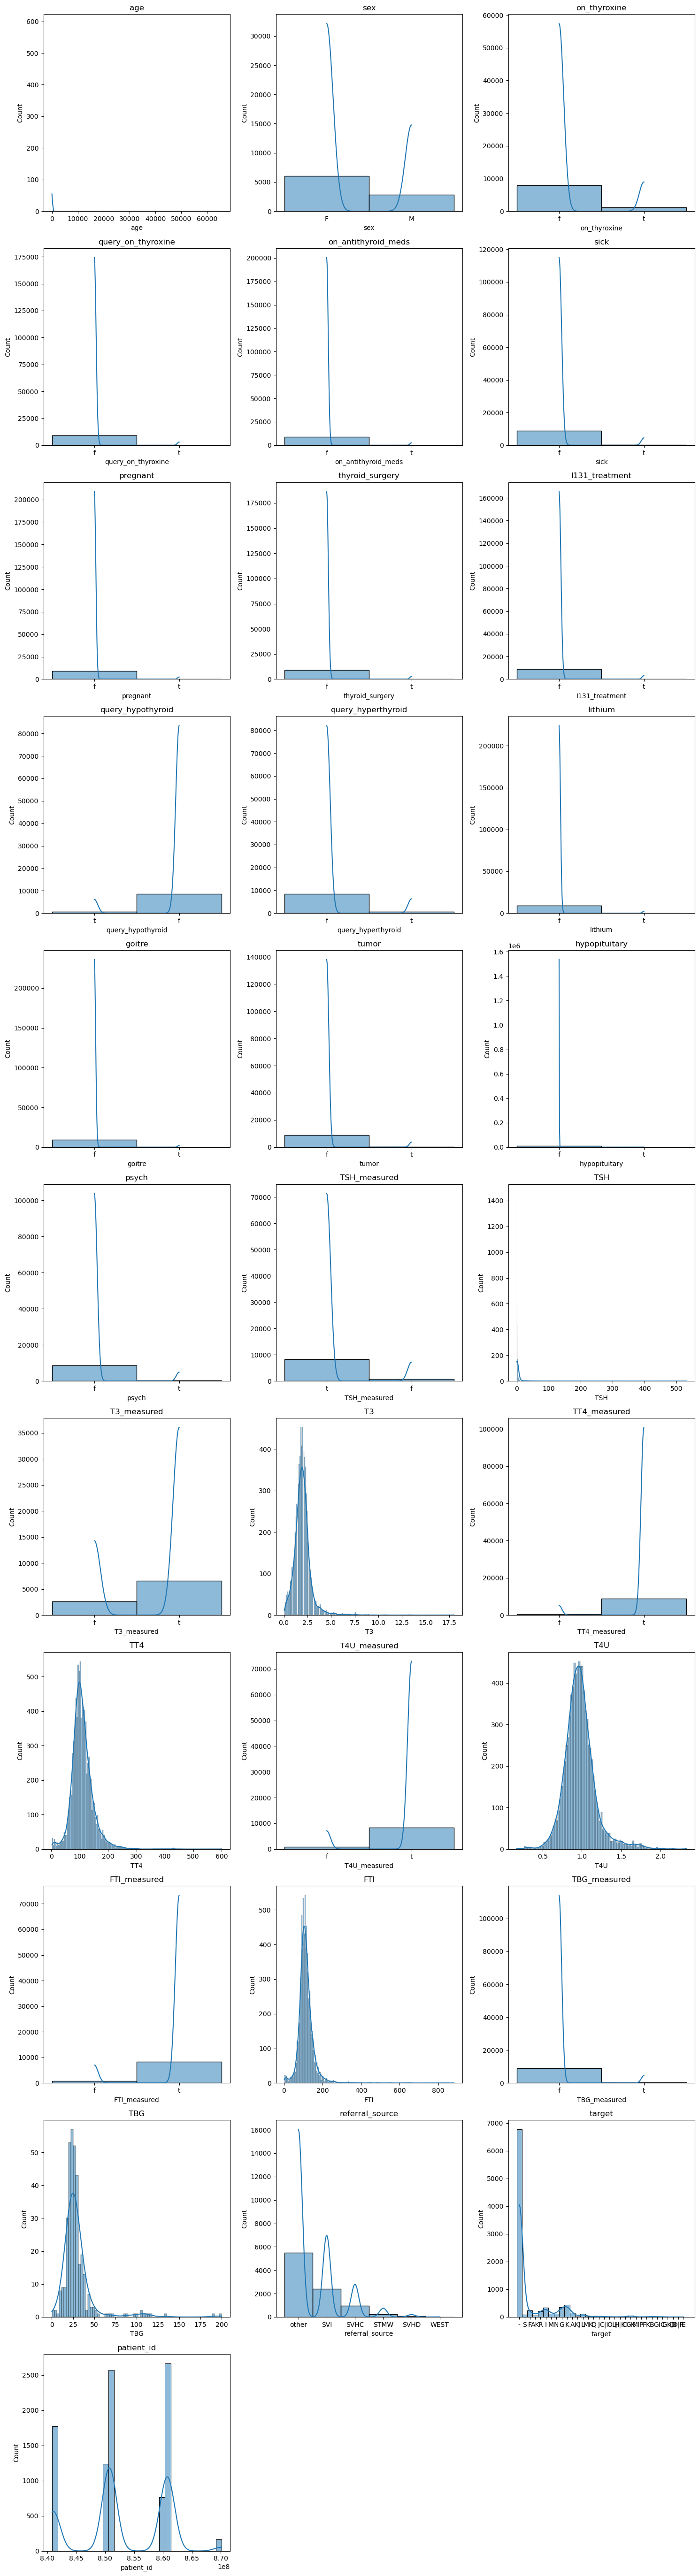

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'your_dataset.csv' with the actual filename)
df = pd.read_csv('C:/Users/dgous/OneDrive/Desktop/thyroidDF.csv')

# Histogram plots
print("Histogram plots for each feature:")

# Set up the matplotlib figure
num_features = len(df.columns)
num_rows = (num_features - 1) // 3 + 1  # Calculate number of rows needed
plt.figure(figsize=(15, 5 * num_rows))

# Loop through each column in the dataframe
for i, column in enumerate(df.columns):
    # Create subplots
    plt.subplot(num_rows, 3, i + 1)
    
    # Plot histogram
    sns.histplot(df[column], kde=True)
    
    # Set title
    plt.title(column)

# Adjust layout
plt.tight_layout()
plt.show()

In [7]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64


In [8]:
df = df.dropna(subset=['sex'])

In [9]:
# 1. Impute missing values for 'sex' with the most common value (mode)
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

# 2. Impute missing values for 'TSH' with the mean value
df['TSH'].fillna(df['TSH'].mean(), inplace=True)

# 3. Impute missing values for 'T3' with the mean value
df['T3'].fillna(df['T3'].mean(), inplace=True)

# 4. Impute missing values for 'TT4' with the mean value
df['TT4'].fillna(df['TT4'].mean(), inplace=True)

# 5. Impute missing values for 'T4U' with the mean value
df['T4U'].fillna(df['T4U'].mean(), inplace=True)

# 6. Impute missing values for 'FTI' with the mean value
df['FTI'].fillna(df['FTI'].mean(), inplace=True)

# 7. Drop the 'TBG' column as it has too many missing values
df.drop('TBG', axis=1, inplace=True)

# Check if missing values are handled
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values After Handling:
age                    0
sex                    0
on_thyroxine           0
query_on_thyroxine     0
on_antithyroid_meds    0
sick                   0
pregnant               0
thyroid_surgery        0
I131_treatment         0
query_hypothyroid      0
query_hyperthyroid     0
lithium                0
goitre                 0
tumor                  0
hypopituitary          0
psych                  0
TSH_measured           0
TSH                    0
T3_measured            0
T3                     0
TT4_measured           0
TT4                    0
T4U_measured           0
T4U                    0
FTI_measured           0
FTI                    0
TBG_measured           0
referral_source        0
target                 0
patient_id             0
dtype: int64


In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

In [11]:
# Separate features (X) and target variable (y)
X = df.drop(['target'], axis=1)
y = df['target']

In [12]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Use X instead of features

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are defined elsewhere in your code
# Select top k features using chi-squared test
k_best = SelectKBest(score_func=chi2, k=10)
X_selected = k_best.fit_transform(X, y)
selected_features_univariate = X.columns[k_best.get_support()]

print("\nSelected Features using chi-squared test:")
print(selected_features_univariate)

# Use RFE with a RandomForestClassifier
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
X_selected_rfe = rfe.fit_transform(X, y)
selected_features_rfe = X.columns[rfe.support_]

print("\nSelected Features using Recursive Feature Elimination (RFE):")
print(selected_features_rfe)


Selected Features using chi-squared test:
Index(['age', 'on_thyroxine', 'pregnant', 'thyroid_surgery', 'TSH', 'T3',
       'TT4', 'FTI', 'TBG_measured', 'patient_id'],
      dtype='object')

Selected Features using Recursive Feature Elimination (RFE):
Index(['TSH', 'T3', 'TT4', 'T4U', 'FTI'], dtype='object')


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Combine selected features from chi-squared test and RFE
selected_features_combined = list(set(selected_features_univariate) | set(selected_features_rfe))

# Split the data with the combined selected features
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X[selected_features_combined], y, test_size=0.2, random_state=42
)

# Initialize the RandomForestClassifier
rfc_combined = RandomForestClassifier(random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

# Initialize the classifier
rfc = RandomForestClassifier(random_state=42)

# Define a parameter grid specific to RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 500],  # Number of trees in the forest
    'max_depth': [3, 5, 7, 9],        # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required at each leaf node
}

# Hyperparameter tuning using GridSearchCV
grid_search_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_rfc.fit(X_train_combined, y_train_combined)

# Get the best classifier from the grid search
best_rfc = grid_search_rfc.best_estimator_

# Evaluate the best classifier using cross-validation on the entire dataset
cv_scores_rfc = cross_val_score(best_rfc, X[selected_features_combined], y, cv=5)
print("\nCross-Validation Scores using combined features with RandomForest:")
print(cv_scores_rfc)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\dgous\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\dgous\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Cross-Validation Scores using combined features with RandomForest:
[0.90073322 0.92780598 0.92554992 0.90919346 0.90693739]


In [17]:
print(df['target'].value_counts())

0     6559
18     425
11     343
16     329
9      226
30     183
1      141
20     114
22     109
25     107
31      83
13      48
2       45
17      27
3       19
24      16
26      14
29      14
5       11
19      10
12      10
15       8
4        6
28       5
10       5
23       2
21       1
14       1
27       1
7        1
6        1
8        1
Name: target, dtype: int64


In [18]:
# Assuming 'threshold' is defined elsewhere in your code
threshold = 100  # Example threshold value, replace it with your desired value

# Convert 'target' column to string to ensure consistent data types
df['target'] = df['target'].astype(str)

# Continue with combining sparse classes into 'other'
value_counts = df['target'].value_counts()
to_replace = value_counts[value_counts <= threshold].index
df['target'] = df['target'].replace(to_replace, 'other')

# Now that 'target' is uniform in type, encode it
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X and y are defined elsewhere in your code
X = df.drop('target', axis=1)  # or your selected features after combining classes
y = df['target']

# Scale your features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42, class_weight='balanced')

In [21]:
pip install --upgrade scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [22]:
from imblearn.over_sampling import SMOTE

# Assuming X_train and y_train are already defined
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
clf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the classifier with the SMOTE-resampled training data
clf.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1312
           1       0.81      0.89      0.85        28
           2       0.95      1.00      0.97        69
           3       0.72      0.88      0.79        66
           4       0.92      0.95      0.94        85
           5       0.64      0.70      0.67        23
           6       0.92      1.00      0.96        22
           7       0.83      0.90      0.86        21
           8       0.73      0.75      0.74        36
           9       0.89      0.93      0.91        45
          10       0.57      0.76      0.65        66

    accuracy                           0.92      1773
   macro avg       0.81      0.88      0.85      1773
weighted avg       0.93      0.92      0.93      1773



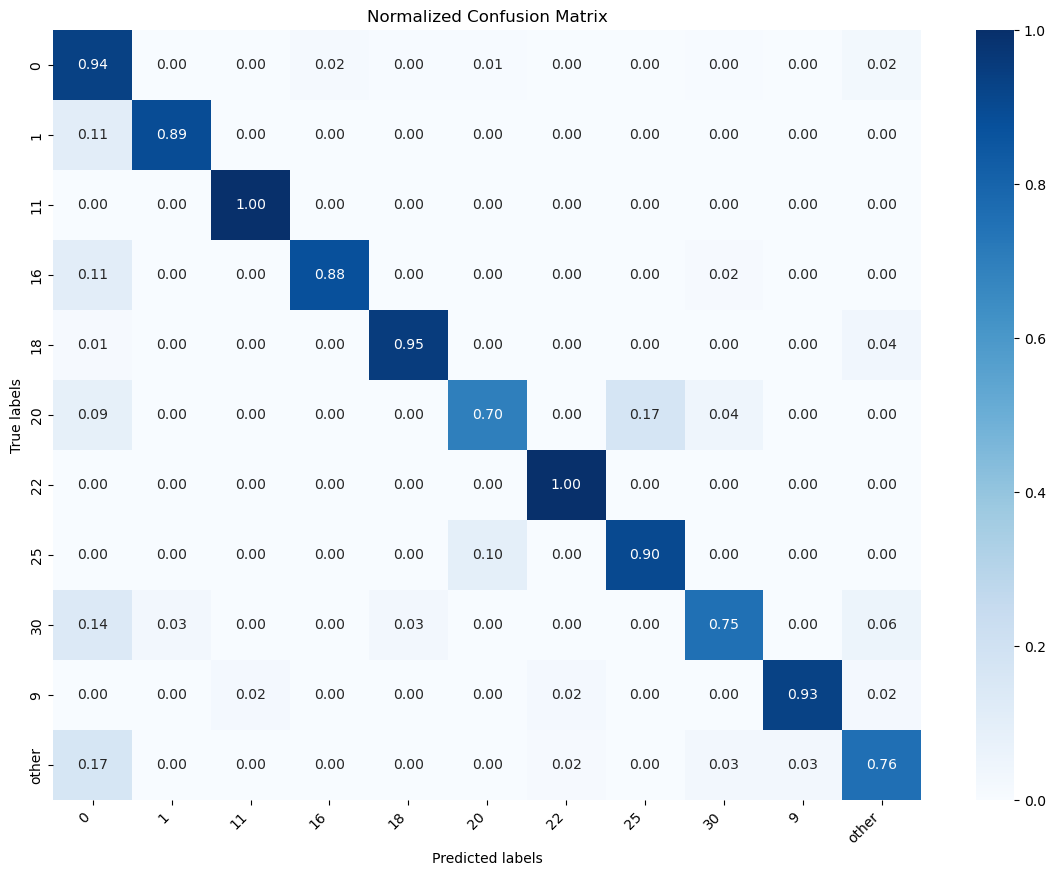

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Optionally normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(14, 10))  # Increase figure size

sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Normalized Confusion Matrix')

# Improve label formatting
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x labels and adjust font size
plt.yticks(fontsize=10)  # Adjust font size for y labels

plt.show()

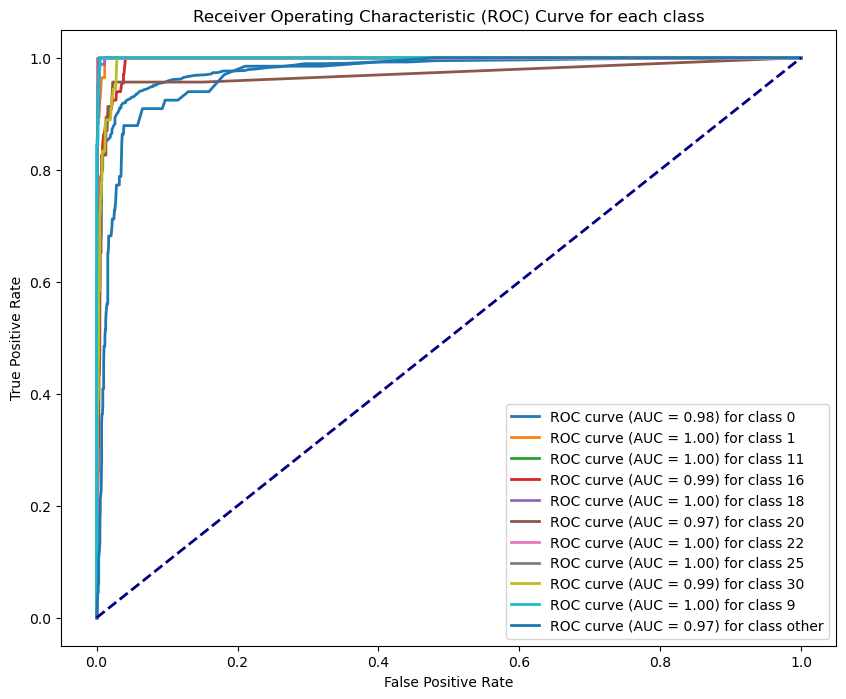

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming clf is your RandomForestClassifier instance
y_probs = clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()

# Binarize y_test
from sklearn.preprocessing import label_binarize
y_test_binarized = label_binarize(y_test, classes=range(len(encoder.classes_)))

for i in range(len(encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(len(encoder.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for class {encoder.classes_[i]}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc='lower right')

plt.show()

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Classification Report for Tuned Classifier:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1312
           1       0.63      0.86      0.73        28
           2       0.34      0.44      0.38        66
           3       0.29      0.39      0.33        69
           4       0.64      0.74      0.69        66
           5       0.55      0.74      0.63        85
           6       0.38      0.74      0.50        23
           7       0.33      0.64      0.43        22
           8       0.65      0.62      0.63        21
           9       0.41      0.44      0.43        36
          10       0.91      0.87      0.89        45

    accuracy                           0.77      1773
   macro avg       0.55      0.66      0.59      1773
weighted avg       0.81      0.77      0.78      1773



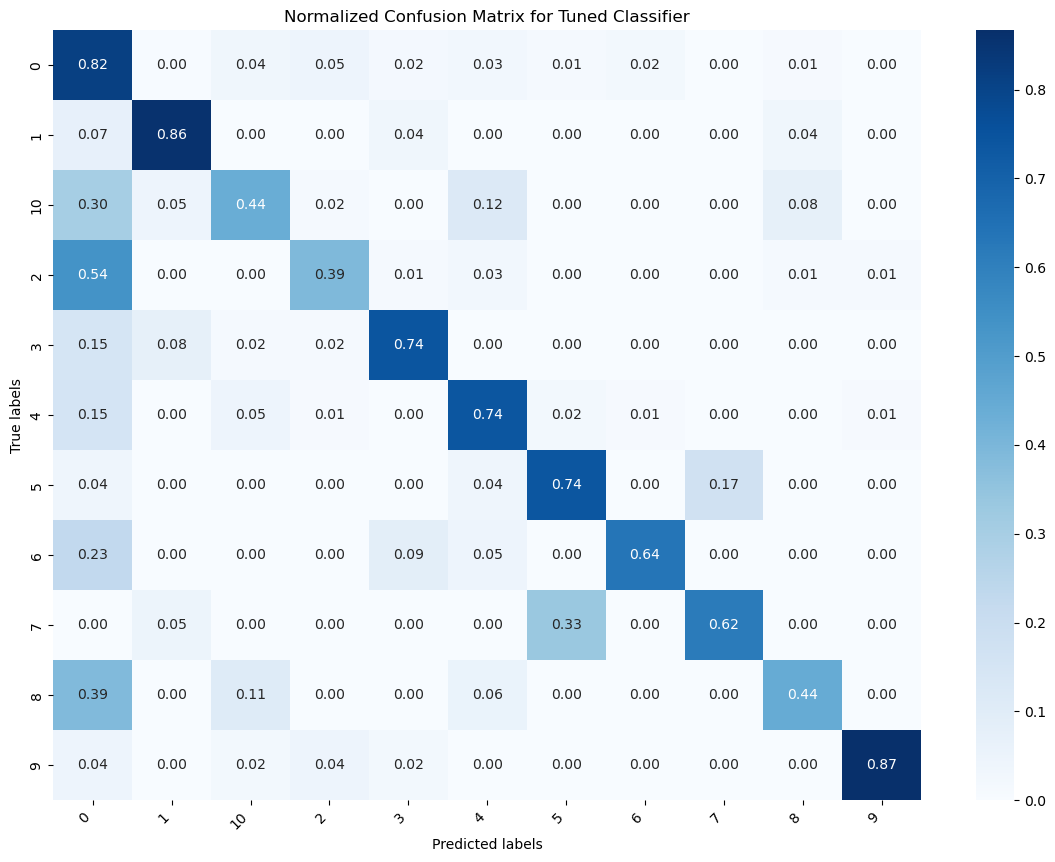

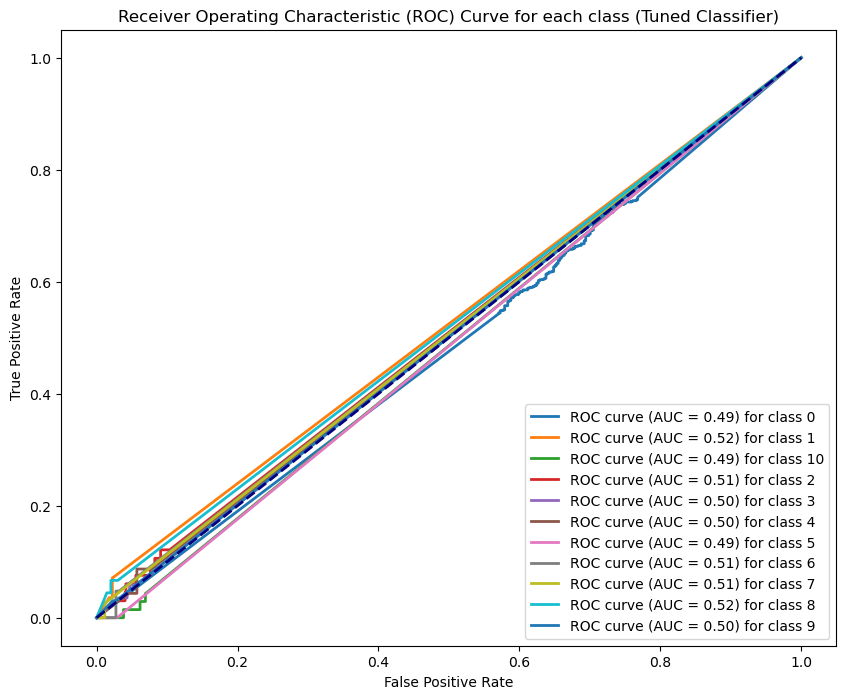

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Assuming 'threshold' is defined elsewhere in your code
threshold = 100  # Example threshold value, replace it with your desired value

# Assuming 'df' is your DataFrame containing the data
# Replace 'df' with your DataFrame name if it's different
# Convert 'target' column to string to ensure consistent data types
df['target'] = df['target'].astype(str)

# Continue with combining sparse classes into 'other'
value_counts = df['target'].value_counts()
to_replace = value_counts[value_counts <= threshold].index
df['target'] = df['target'].replace(to_replace, 'other')

# Now that 'target' is uniform in type, encode it
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

# Assuming X and y are defined elsewhere in your code
X = df.drop('target', axis=1)  # or your selected features after combining classes
y = df['target']

# Scale your features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Perform SMOTE oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define the parameter grid to search through
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting scheme for neighbors
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV with the specified parameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Perform grid search on the SMOTE-resampled training data
grid_search.fit(X_train_smote, y_train_smote)

# Get the best parameters found by grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Initialize the classifier with the best parameters
clf_tuned = KNeighborsClassifier(**best_params)

# Train the classifier with the SMOTE-resampled training data
clf_tuned.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_tuned = clf_tuned.predict(X_test)

# Evaluate the tuned classifier
print("Classification Report for Tuned Classifier:")
print(classification_report(y_test, y_pred_tuned))

# Plot confusion matrix for the tuned classifier
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
cm_normalized_tuned = cm_tuned.astype('float') / cm_tuned.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(14, 10))
sns.heatmap(cm_normalized_tuned, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Normalized Confusion Matrix for Tuned Classifier')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Compute ROC curve and ROC area for each class for the tuned classifier
y_probs_tuned = clf_tuned.predict_proba(X_test)
fpr_tuned, tpr_tuned, roc_auc_tuned = dict(), dict(), dict()

for i in range(len(encoder.classes_)):
    fpr_tuned[i], tpr_tuned[i], _ = roc_curve(y_test_binarized[:, i], y_probs_tuned[:, i])
    roc_auc_tuned[i] = auc(fpr_tuned[i], tpr_tuned[i])

# Plot ROC curves for each class for the tuned classifier
plt.figure(figsize=(10, 8))
for i in range(len(encoder.classes_)):
    plt.plot(fpr_tuned[i], tpr_tuned[i], lw=2, label=f'ROC curve (AUC = {roc_auc_tuned[i]:.2f}) for class {encoder.classes_[i]}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class (Tuned Classifier)')
plt.legend(loc='lower right')
plt.show()

In [27]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE

# Assuming 'threshold' is defined elsewhere in your code
threshold = 100  # Example threshold value, replace it with your desired value

# Convert 'target' column to string to ensure consistent data types
df['target'] = df['target'].astype(str)

# Continue with combining sparse classes into 'other'
value_counts = df['target'].value_counts()
to_replace = value_counts[value_counts <= threshold].index
df['target'] = df['target'].replace(to_replace, 'other')

# Now that 'target' is uniform in type, encode it
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

# Assuming X and y are defined elsewhere in your code
X = df.drop('target', axis=1)  # or your selected features after combining classes
y = df['target']

# Scale your features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Perform SMOTE oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the classifier (XGBoost classifier)
clf = XGBClassifier()

# Train the classifier with the SMOTE-resampled training data
clf.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(14, 10))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Normalized Confusion Matrix')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Compute ROC curve and ROC area for each class
y_probs = clf.predict_proba(X_test)
fpr, tpr, roc_auc = dict(), dict(), dict()

y_test_binarized = label_binarize(y_test, classes=range(len(encoder.classes_)))

for i in range(len(encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(len(encoder.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for class {encoder.classes_[i]}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc='lower right')
plt.show()

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1312
           1       0.81      0.93      0.87        28
           2       0.78      0.86      0.82        36
           3       0.95      0.93      0.94        45
           4       0.51      0.73      0.60        66
           5       0.94      0.97      0.96        69
           6       0.71      0.80      0.75        66
           7       0.90      0.98      0.94        85
           8       0.75      0.78      0.77        23
           9       0.95      0.91      0.93        22
          10       0.87      0.95      0.91        21

    accuracy                           0.92      1773
   macro avg       0.83      0.89      0.86      1773
weighted avg       0.93      0.92      0.92      1773



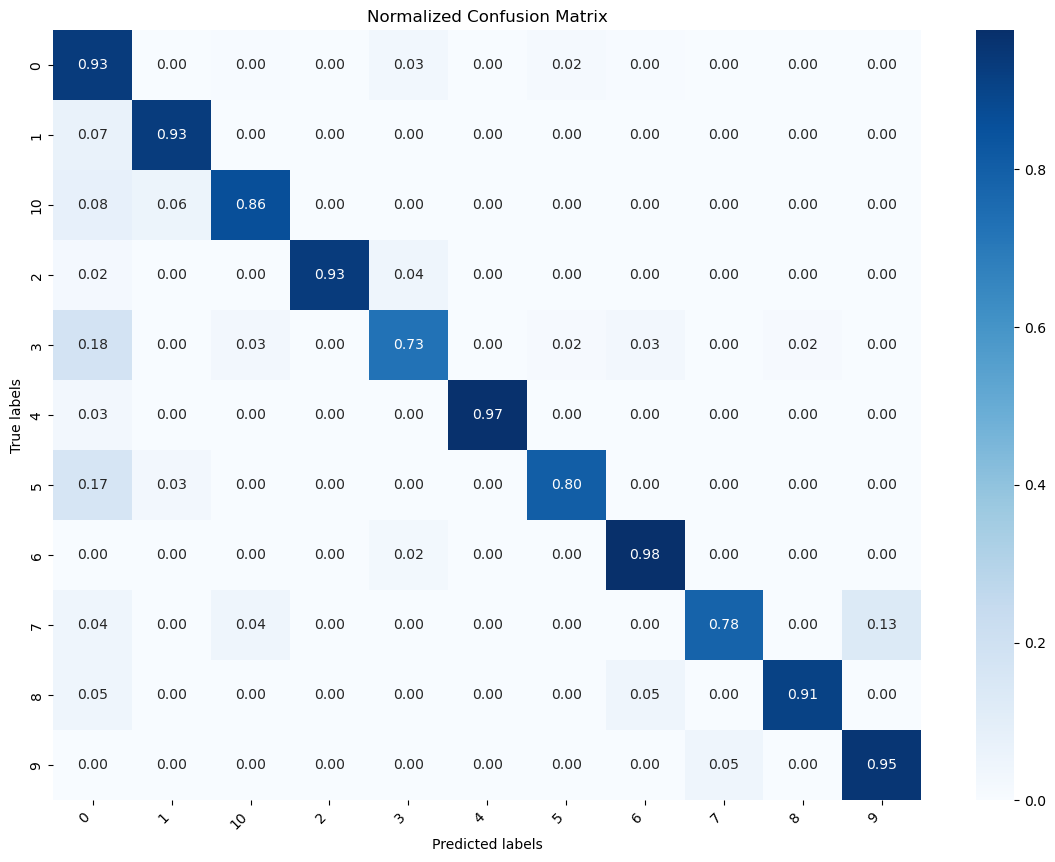

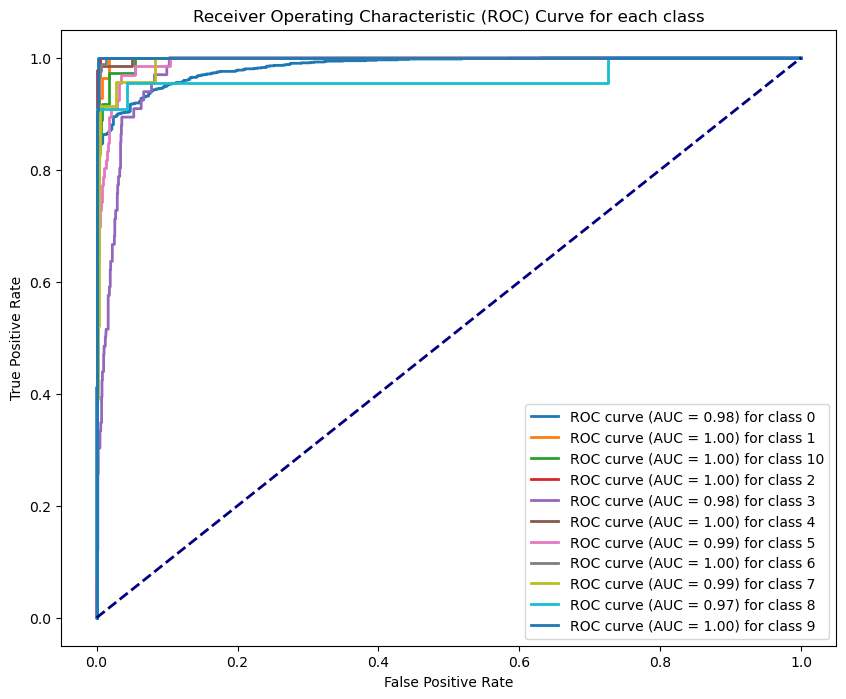

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from imblearn.over_sampling import SMOTE

# Assuming 'threshold' is defined elsewhere in your code
threshold = 100  # Example threshold value, replace it with your desired value

# Convert 'target' column to string to ensure consistent data types
df['target'] = df['target'].astype(str)

# Continue with combining sparse classes into 'other'
value_counts = df['target'].value_counts()
to_replace = value_counts[value_counts <= threshold].index
df['target'] = df['target'].replace(to_replace, 'other')

# Now that 'target' is uniform in type, encode it
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

# Assuming X and y are defined elsewhere in your code
X = df.drop('target', axis=1)  # or your selected features after combining classes
y = df['target']

# Scale your features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Perform SMOTE oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the classifier (XGBoost classifier)
clf = XGBClassifier()

# Train the classifier with the SMOTE-resampled training data
clf.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(14, 10))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Normalized Confusion Matrix')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Compute ROC curve and ROC area for each class
y_probs = clf.predict_proba(X_test)
fpr, tpr, roc_auc = dict(), dict(), dict()

y_test_binarized = label_binarize(y_test, classes=range(len(encoder.classes_)))

for i in range(len(encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(len(encoder.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for class {encoder.classes_[i]}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc='lower right')
plt.show()